In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pathlib import Path
import os

# Determine the project path based on the current working directory or the script's path
try:
    PROJECT_PATH = Path(__file__).parents[1]
except NameError:
    PROJECT_PATH = Path(os.getcwd()).parents[0]

HEADPOSE_PATH = Path(PROJECT_PATH, "data/headpose_data")
FIGURE_PATH = Path(PROJECT_PATH, "figures")

data = pd.read_csv(Path(HEADPOSE_PATH, "headpose_values.csv"))
data['participant_id'] = data['participant_id'].str.replace('td', '').astype(int)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['yaw', 'pitch', 'roll']])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_scaled)

/home/cko4/2023_asd_gaze/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [30]:
data['cluster'] = kmeans.labels_

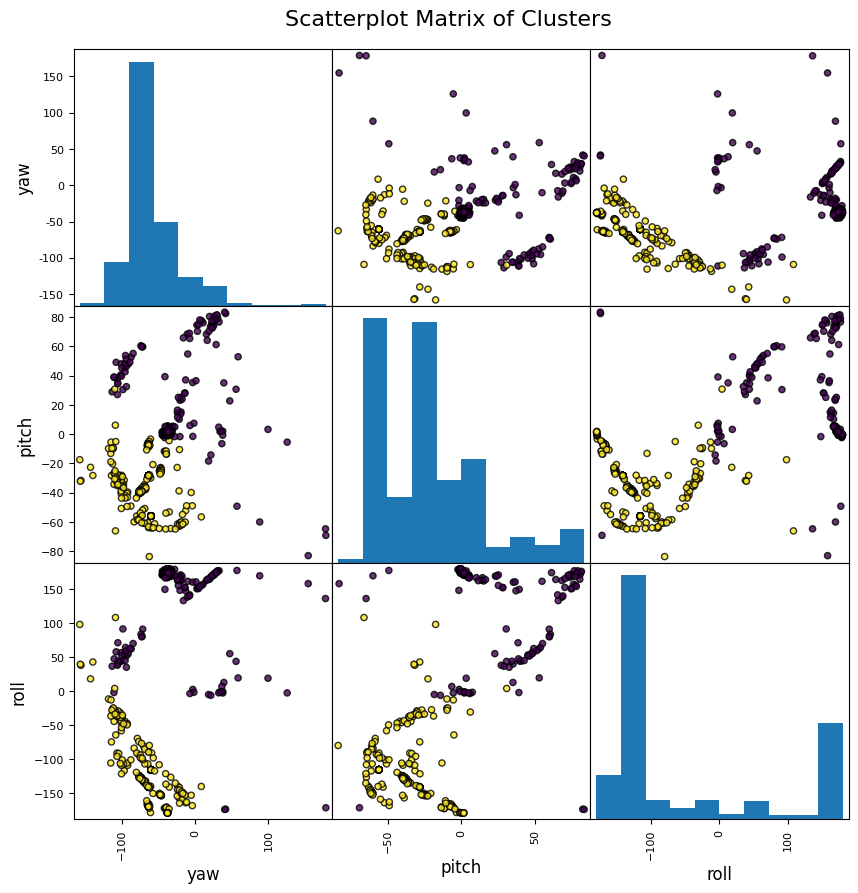

In [31]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Create a scatterplot matrix with colors based on the cluster labels
scatter_matrix(data[['yaw', 'pitch', 'roll']], c=data['cluster'], figsize=(10, 10), diagonal='hist', alpha=0.8, s=80, edgecolors='k')

# Customize plot labels and title
for ax in plt.gcf().get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
plt.suptitle('Scatterplot Matrix of Clusters', fontsize=16, y=0.92)

# Show plot
plt.show()


In [33]:
# Calculate cluster statistics
cluster_stats = data.groupby('cluster').agg(['mean', 'std'])
print(cluster_stats)

        participant_id                  yaw                 pitch              
                  mean       std       mean        std       mean        std   
cluster                                                                        
0             1.994792  0.072169 -24.063967  48.373531  20.540127  31.822647  \
1             1.175983  0.381201 -65.219250  20.115978 -39.073174  16.872804   

               roll             
               mean        std  
cluster                         
0        133.509347  70.118154  
1       -122.014192  37.076866  


In [34]:
# Group data by clusters and extract participant IDs
grouped_data = data.groupby('cluster')['participant_id']
for cluster, participants in grouped_data:
    print(f"Cluster {cluster}: {participants.values}")

Cluster 0: [1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]
Cluster 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1